In [58]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [59]:
df = pd.read_csv('data/click.csv', sep='\\,')  ##클릭횟수별 광고료
df

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,클릭수,광고비
0,235,591
1,216,539
2,148,413
3,35,310
4,85,308
5,204,519
6,49,325
7,25,332
8,173,498
9,191,498


In [60]:
X=df['클릭수'].values
y=df['광고비'].values


In [61]:
X = X.reshape(-1, 1)
X

array([[235],
       [216],
       [148],
       [ 35],
       [ 85],
       [204],
       [ 49],
       [ 25],
       [173],
       [191],
       [134],
       [ 99],
       [117],
       [112],
       [162],
       [272],
       [159],
       [159],
       [ 59],
       [198]], dtype=int64)

In [62]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [63]:
lr.score(X, y)

0.9015388295800125

In [64]:
lr.predict([[235]])

array([559.49065085])

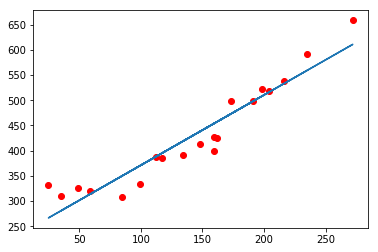

In [65]:
plt.scatter(X, y, c='r')
plt.plot(X, lr.predict(X))

## 테스트 데이타를 위한 함수 생성

In [66]:
def f(size):
    x = np.linspace(0, 5, size)
    y = x * np.sin(x ** 2) + 1
    return (x,y)

def sample(size):
    x = np.linspace(0, 5, size)
    y = x * np.sin(x ** 2) + 1 + np.random.randn(x.size)*0.5
    return (x,y)

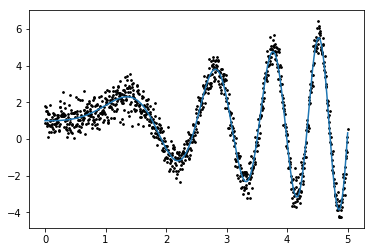

In [141]:
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
X, y = sample(1000)
plt.scatter(X, y, s=3, c="black")
plt.show()

In [142]:
X.shape, y.shape

((1000,), (1000,))

In [143]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)

In [144]:
from sklearn.linear_model import LinearRegression

In [145]:
lr = LinearRegression()
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

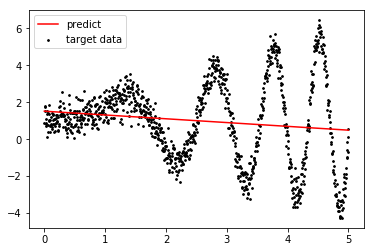

In [146]:
plt.scatter(X.flatten(), y.flatten(), s=3, c="black", label='target data')
plt.plot(X.flatten(), lr.predict(X).flatten(), c='r', label='predict')
plt.legend()
plt.show()

In [147]:
from sklearn.preprocessing import PolynomialFeatures

In [148]:
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)
print('X.shape=%s, X_poly.shape=%s' %(X.shape, X_poly.shape))
X[:2], X_poly[:2]

X.shape=(1000, 1), X_poly.shape=(1000, 3)


(array([[0.        ],
        [0.00500501]]),
 array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [1.00000000e+00, 5.00500501e-03, 2.50500751e-05]]))

In [149]:
lr = LinearRegression()
lr.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

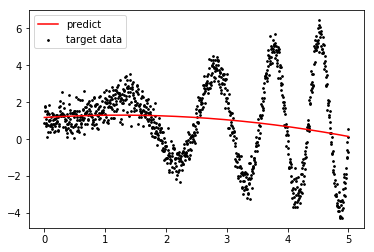

In [150]:
plt.scatter(X.flatten(), y.flatten(), s=3, c="black", label='target data')
plt.plot(X.flatten(), lr.predict(X_poly).flatten(), c='r', label='predict')
plt.legend()
plt.show()

In [151]:
from sklearn.preprocessing import PolynomialFeatures


In [152]:
X_poly = PolynomialFeatures(degree=22).fit_transform(X)


In [153]:
lr = LinearRegression()
lr.fit(X_poly,y)
lr.score(X_poly,y)

0.9363251371765559

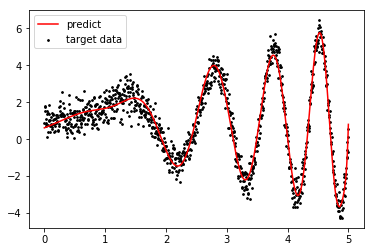

In [154]:
plt.scatter(X.flatten(), y.flatten(), s=3, c="black", label='target data')
plt.plot(X.flatten(), lr.predict(X_poly).flatten(), c='r', label='predict')
plt.legend()
plt.show()

In [155]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

def mse(predictions, targets):
    return 0.5 * np.sum((predictions - targets) ** 2)



In [156]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [138]:
ridge_model = Ridge()

In [157]:
ridge_model.fit(X_poly, y)
ridge_model.score(X_poly, y)


0.9382743616831669

## 학습용 데이타

import mglearn

X, y = mglearn.datasets.load_extended_boston()

from sklearn.datasets import load_bostn

boston = load_boston()


### 예제) 보스턴 평균주택 가격 예측 문제 
### data 는 13 개의 feature 로 이루어져 있고 label 은 주택가격의 중간값(MEDV )
데이터셋 구성
1. CRIM: 자치시(town) 별 1인당 범죄율
2. ZN: 25,000 평방피트를 초과하는 거주지역의 비율
3. INDUS:비소매상업지역이 점유하고 있는 토지의 비율
4. CHAS: 찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)
5. NOX: 10ppm 당 농축 일산화질소
6. RM: 주택 1가구당 평균 방의 개수
7. AGE: 1940년 이전에 건축된 소유주택의 비율
8. DIS: 5개의 보스턴 직업센터까지의 접근성 지수
9. RAD: 방사형 도로까지의 접근성 지수
10. TAX: 10,000 달러 당 재산세율
11. PTRATIO: 자치시(town)별 학생/교사 비율
12. B: 1000(Bk-0.63)^2, 여기서 Bk는 자치시별 흑인의 비율을 말함.
13. LSTAT: 모집단의 하위계층의 비율(%)
14. MEDV: 본인 소유의 주택가격(중앙값) (단위: $1,000)



In [158]:
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from pandas import DataFrame, Series

In [159]:
df = pd.read_csv('data/housing.csv', sep='\\s+', header=None)


In [160]:
dataset = df.values
y = df[13]  # 본인 소유의 주택가격(중앙값) (단위: $1,000)
X = df.values[:,0:13]


In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [162]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test)

(0.7270141355280066, 0.7820346084005656)

In [163]:
degree = 2

In [164]:
polynomial = PolynomialFeatures(degree=degree)
X_train_ploy = polynomial.fit_transform(X_train)
X_test_ploy = polynomial.transform(X_test)


In [165]:
model = LinearRegression()
model.fit(X_train_ploy, y_train)
model.score(X_train_ploy, y_train)

0.9327126742098218

In [166]:
model.score(X_test_ploy, y_test)

0.8605900035146561

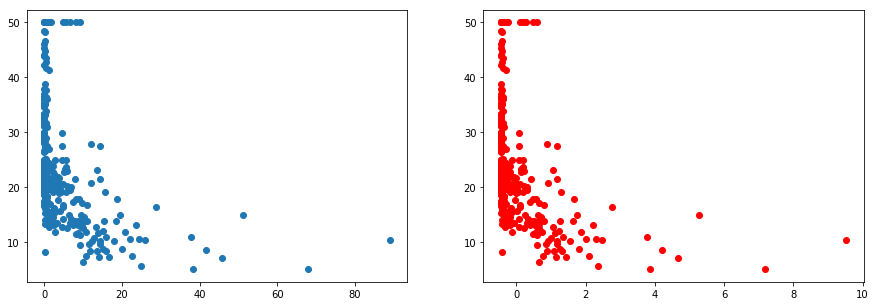

In [167]:
X_train_ploy = StandardScaler().fit_transform(X_train)

fig = plt.figure(figsize=(15,5))
plt1 = fig.add_subplot(1,2,1)
plt2 = fig.add_subplot(1,2,2)
plt1.scatter(X_train[:,0], y_train)
plt2.scatter(X_train_ploy[:,0], y_train, c='r')

In [186]:
degree=2
scaler = StandardScaler();
X_train_ploy = scaler.fit_transform(X_train)
X_test_ploy = scaler.transform(X_test)

In [187]:
polynomial = PolynomialFeatures(degree=degree)
X_train_ploy = polynomial.fit_transform(X_train_ploy)
X_test_ploy = polynomial.transform(X_test_ploy)


In [188]:
model = LinearRegression()
model.fit(X_train_ploy, y_train)
model.score(X_train_ploy, y_train)

0.9331164962130355

In [189]:
X_test[1], y_test.iloc[1]  #해당데이타 집값 31.7


(array([  0.46296,   0.     ,   6.2    ,   0.     ,   0.504  ,   7.412  ,
         76.9    ,   3.6715 ,   8.     , 307.     ,  17.4    , 376.14   ,
          5.25   ]), 31.7)

In [190]:
a = X_test[1].reshape(1,-1)


In [191]:
model.predict(polynomial.transform(scaler.transform(a)))   #예측 집값 35

array([35.0188181])

In [192]:
model.score(X_test_ploy, y_test)

0.8641814023041298